Q1:- What is Simple Linear Regression?

Ans:-Simple Linear Regression (SLR) is a statistical method used to study the relationship between two variables — one independent variable (X) and one dependent variable (Y) — by fitting a straight line to the observed data.

Purpose

The goal of simple linear regression is to predict or explain the dependent variable Y based on the value of the independent variable X.

Q2:-What are the key assumptions of Simple Linear Regression?

ans:-
The key assumptions of Simple Linear Regression (SLR) ensure that the model gives reliable, unbiased, and valid results. Here are the main assumptions explained clearly:

1. Linearity
The relationship between the independent variable (X) and the dependent variable (Y) must be linear.

This means Y changes at a constant rate as X changes.

Example: If hours studied increase by 1 hour, exam scores should increase (or decrease) by roughly the same amount each time.

Check: Plot a scatter plot of X vs Y. The pattern should look roughly like a straight line.

2. Independence of Errors
The residuals (differences between actual and predicted values) should be independent of each other.

No correlation should exist between consecutive errors (important in time-series data).

Check: Use the Durbin-Watson test to detect autocorrelation in residuals.

3. Homoscedasticity (Constant Variance of Errors)
The variance of the residuals should be constant across all values of X.

In other words, the spread of errors should be roughly the same for all fitted values.

Check: Plot residuals vs. fitted values — the points should show no clear pattern or “funnel” shape.

4. Normality of Errors
The residuals (errors) should be normally distributed around the regression line.

This is crucial for hypothesis testing and confidence intervals.

Check: Use a histogram or Q-Q plot of residuals — they should roughly follow a normal distribution.

5. No (or Minimal) Measurement Error in X
The independent variable X should be measured accurately (without significant error).

Errors in measuring X can bias the slope and intercept estimates.

Q3:-What is heteroscedasticity, and why is it important to address in regression models?

Ans:-

What is Heteroscedasticity?

Heteroscedasticity means that the variance of the errors (residuals) in a regression model is not constant across all values of the independent variable(s). In other words, the spread of errors changes — sometimes large, sometimes small — instead of staying even.

Why It’s Important to Address

Heteroscedasticity violates a key assumption of linear regression (constant variance of errors). If not fixed, it can cause problems like: Incorrect standard errors Unreliable hypothesis tests (t-tests, F-tests) Misleading confidence intervals

So, even if the coefficients themselves are unbiased, your statistical conclusions become unreliable.

How to Fix It
Transform the dependent variable (e.g., use log(Y)) Use robust standard errors Apply Weighted Least Squares (WLS)

Q4:-What is Multiple Linear Regression?

Ans:-
Multiple Linear Regression (MLR) is a statistical technique used to study the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, X₃, …).

It’s an extension of Simple Linear Regression, which only uses one predictor.

Assumptions of MLR

Linearity – Relationship between Y and each X is linear.

Independence – Observations are independent.

Homoscedasticity – Constant variance of errors.

Normality – Errors are normally distributed.

No multicollinearity – Independent variables aren’t too highly correlated.

Q5:-What is polynomial regression, and how does it differ from linear regression?

Ans:-
Polynomial Regression is a type of regression analysis where the relationship between the independent variable (X) and the dependent variable (Y) is modeled as an nth-degree polynomial (instead of a straight line).

Key Point

Even though polynomial regression produces a curved line, it’s still considered a linear model because it’s linear in the coefficients (β), not in the variable X.



Intercept (β₀): 0.18
Slope (β₁): 1.98
Regression Equation: Y = 0.18 + 1.98X


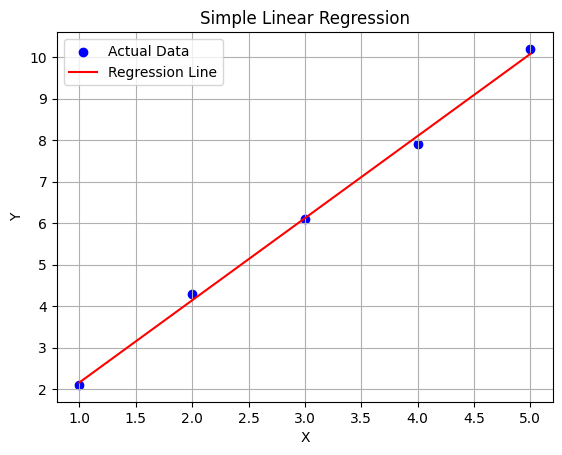

In [1]:
# # Q6:-Implement a Python program to fit a Simple Linear Regression model to the following sample data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points.
# (Include your Python code and output in the code box below.)
#Ans:-
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Get slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Predict Y values
Y_pred = model.predict(X)

# Print model parameters and equation
print(f"Intercept (β₀): {intercept:.2f}")
print(f"Slope (β₁): {slope:.2f}")
print(f"Regression Equation: Y = {intercept:.2f} + {slope:.2f}X")

# Plot the data points and regression line
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# # Q7:-Fit a Multiple Linear Regression model on this sample data:
# ● Area = [1200, 1500, 1800, 2000]
# ● Rooms = [2, 3, 3, 4]
# ● Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results.
# (Include your Python code and output in the code box below.)
#Ans:-
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Given data
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

# Create DataFrame
data = pd.DataFrame({
    'Area': Area,
    'Rooms': Rooms,
    'Price': Price
})

# Independent and dependent variables
X = data[['Area', 'Rooms']]
Y = data['Price']

# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Get coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_

# Print regression equation
print("Regression Equation:")
print(f"Price = {intercept:.2f} + ({coefficients[0]:.2f} * Area) + ({coefficients[1]:.2f} * Rooms)")

# Calculate VIF (Variance Inflation Factor) for each independent variable
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i + 1) for i in range(len(X.columns))]

print("\nVariance Inflation Factor (VIF) Results:")
print(vif_data)


Regression Equation:
Price = 103157.89 + (63.16 * Area) + (34736.84 * Rooms)

Variance Inflation Factor (VIF) Results:
  Feature       VIF
0    Area  7.736842
1   Rooms  7.736842


Intercept (β₀): 0.06
Coefficients (β₁, β₂): 1.94, 0.20
Regression Equation: Y = 0.06 + 1.94*X + 0.20*X^2


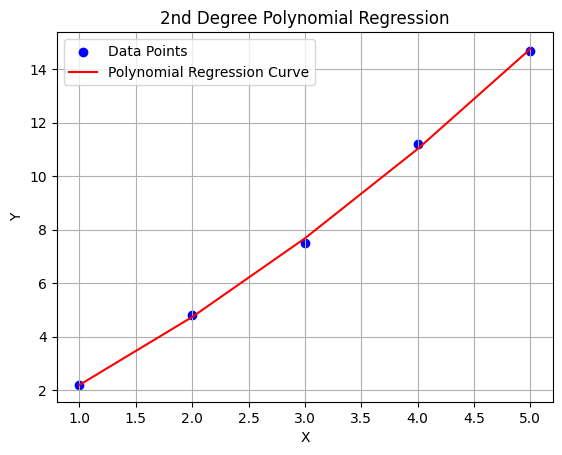

In [3]:
# # Q8:- Implement polynomial regression on the following data: ● X = [1, 2, 3, 4, 5]

# ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve.
# (Include your Python code and output in the code box below.)
#Ans:-
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform features to include polynomial terms (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict Y values
Y_pred = model.predict(X_poly)

# Print model coefficients
print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Coefficients (β₁, β₂): {model.coef_[1]:.2f}, {model.coef_[2]:.2f}")
print(f"Regression Equation: Y = {model.intercept_:.2f} + {model.coef_[1]:.2f}*X + {model.coef_[2]:.2f}*X^2")

# Plot the original data points and polynomial regression curve
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Polynomial Regression Curve')
plt.title('2nd Degree Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


Residuals: [-3.   5.5 -1.  -2.5  1. ]


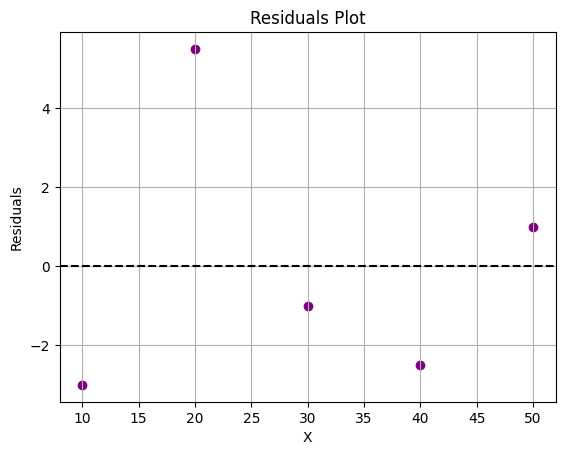

In [4]:
# #Q9:-Create a residuals plot for a regression model trained on this data: ● X = [10, 20, 30, 40, 50]
# ● Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.
# (Include your Python code and output in the code box below.)
#Ans:-
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Simple Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Predict Y values
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Print residuals
print("Residuals:", residuals)

# Plot residuals
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


Q10:-Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

Ans:-
Scenario

You’re predicting house prices (Y) using features like: Area (X₁) Number of rooms (X₂) Location (X₃)

But you detect: Heteroscedasticity → error variance is not constant Multicollinearity → predictors are highly correlated

Step 1: Handle Heteroscedasticity

Transform the dependent variable (Y) Use log(Y) or square root transformation to stabilize variance. Example: Y_log = log(Price)

Weighted Least Squares (WLS) Assign weights inversely proportional to variance of errors. Gives more weight to points with smaller variance.

Robust Standard Errors Use heteroscedasticity-robust standard errors to get reliable inference even if heteroscedasticity persists.

Check Residual Plots Plot residuals vs. fitted values after transformation to confirm variance stabilization.

Step 2: Handle Multicollinearity

Check Variance Inflation Factor (VIF) Identify highly correlated predictors (VIF > 5 or 10).

Remove or Combine Correlated Features Drop one of the highly correlated variables (e.g., if Area and Number of Rooms are strongly correlated, keep only one). Or combine features into a single metric (e.g., Rooms per Area).

Regularization Methods Use Ridge Regression (L2) or Lasso Regression (L1) to reduce the impact of multicollinearity and stabilize coefficient estimates.

Step 3: Model Validation

Split data into train/test sets or use cross-validation. Evaluate model performance using metrics like RMSE, MAE, and R². Check residual plots again to ensure heteroscedasticity is mitigated.

Step 4: Document & Communicate

Report any transformations or feature engineering performed. Explain model assumptions and limitations to stakeholders.